#  Decision Trees

In this assignment I will implement a Decision Tree algorithm as learned in class.


## In this exercise I will perform the following:
1. Practice OOP in python.
2. Implement two impurity measures: Gini and Entropy.
3. Construct a decision tree algorithm.
4. Prune the tree to achieve better results.
5. Visualize your results.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## OOP in python

The desicion tree will be implemented using a dedicated python class.


In [2]:
class Node(object):
    def __init__(self, data):
        self.data = data
        self.children = []

    def add_child(self, node):
        self.children.append(node)

In [3]:
n = Node(5)
p = Node(6)
q = Node(7)
n.add_child(p)
n.add_child(q)
n.children

[<__main__.Node at 0x567a5b0>, <__main__.Node at 0x567a688>]

## Data preprocessing

For the following exercise, we will use a dataset containing mushroom data `agaricus-lepiota.csv`. 

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous
one (=there are only two classes **edible** and **poisonous**). 
    
The dataset contains 8124 observations with 22 features:
1. cap-shape: bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
4. bruises: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

First, we will read and explore the data using pandas and the `.read_csv` method. Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

In [4]:
# load dataset
data = pd.read_csv('agaricus-lepiota.csv')
data

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,p


One of the advantages of the Decision Tree algorithm is that almost no preprocessing is required. However, finding missing values is always required.

In [5]:
data.dropna(axis = 1,inplace = True)

We will split the dataset to `Training` and `Testing` datasets.

In [6]:
from sklearn.model_selection import train_test_split
# Making sure the last column will hold the labels
X, y = data.drop('class', axis=1), data['class']
X = np.column_stack([X,y])
# split dataset using random_state to get the same split each time
X_train, X_test = train_test_split(X, random_state=99)

print("Training dataset shape: ", X_train.shape)
print("Testing dataset shape: ", X_test.shape)

Training dataset shape:  (6093, 22)
Testing dataset shape:  (2031, 22)


In [7]:
y.shape

(8124,)

## Impurity Measures

Impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. Implement the functions `calc_gini` and `calc_entropy`. You are encouraged to test your implementation.

In [8]:
def calc_gini(data):
    """
    Calculate gini impurity measure of a dataset.
 
    Input:
    - data: any dataset where the last column holds the labels.
 
    Returns the gini impurity.    
    """
    gini = 0.0
    
    group_size = len(data) 
    
    #returns the number of appearnces in each class
    num_of_each_class = list(np.unique(data[:,-1] ,return_counts=True)[1])
    gini = 1 
    
    #use fourmula learned in class
    for num_of_appearnces in num_of_each_class:
        gini = gini - ( ( num_of_appearnces/group_size )**2 )
    
    
    return gini

In [9]:
def calc_entropy(data):
    """
    Calculate the entropy of a dataset.

    Input:
    - data: any dataset where the last column holds the labels.

    Returns the entropy of the dataset.    
    """
    entropy = 0.0
  
    group_size = len(data) 
    
    #returns the number of appearnces in each class
    num_of_each_class = list(np.unique(data[:,-1] ,return_counts=True)[1])
    
    #use fourmula learned in class
    for num_of_appearnces in num_of_each_class:
        p = num_of_appearnces/group_size
        entropy += p *( np.log2(p) ) 
    
    entropy *= -1
 
    return entropy

In [10]:
calc_gini(X), calc_entropy(X)

(0.49956363223797745, 0.9993703627906085)

## Goodness of Split

Given a feature the Goodnees of Split measures the reduction in the impurity if we split the data according to the feature.
$$
\Delta\varphi(S, A) = \varphi(S) - \sum_{v\in Values(A)} \frac{|S_v|}{|S|}\varphi(S_v)
$$

In our implementation the goodness_of_split function will return either the Goodness of Split or the Gain Ratio as learned in class. You'll control the return value with the `gain_ratio` parameter. If this parameter will set to False (the default value) it will return the regular Goodness of Split. If it will set to True it will return the Gain Ratio.
$$
GainRatio(S,A)=\frac{InformationGain(S,A)}{SplitInformation(S,A)}
$$
Where:
$$
InformationGain(S,A)=Goodness\ of\ Split\ calculated\ with\ Entropy\ as\ the\ Impurity\ function \\
SplitInformation(S,A)=- \sum_{a\in A} \frac{|S_a|}{|S|}\log\frac{|S_a|}{|S|}
$$
NOTE: you can add more parameters to the function and you can also add more returning variables (The given parameters and the given returning variable should not be touch).

In [11]:
def goodness_of_split(data, feature, impurity_func, gain_ratio=False):
    """
    Calculate the goodness of split of a dataset given a feature and impurity function.

    Input:
    - data: any dataset where the last column holds the labels.
    - feature: the feature index.
    - impurity func: a function that calculates the impurity.
    - gain_ratio: goodness of split or gain ratio flag.

    Returns the goodness of split (or the Gain Ration).  
    """
    
    feature_col = data[:,feature] 
    feature_and_class = np.column_stack( (feature_col ,data[:,-1]) ) 
    
    #getting unique values array and the number of appearances for each value
    all_values_of_feature, num_of_appearances = np.unique(feature_and_class[:,0], return_counts = True)
    size_of_data = len(feature_and_class)
    
    goodness = -1
    
    #gain ration is false
    if not gain_ratio:
        goodness = impurity_func(data)
        goodness_to_sub = 0 

        for i in range(0,len(all_values_of_feature)):
            value = all_values_of_feature[i]

            value_appearnces = num_of_appearances[i]
        
            calc_impurity_of_value = impurity_func(feature_and_class[np.where(feature_and_class[:,0] == value)])
            goodness_to_sub += (value_appearnces/size_of_data)*(calc_impurity_of_value)

        goodness =  goodness - goodness_to_sub
     
    #gain ration is true
    else:
        goodness = goodness_of_split(data, feature, calc_entropy, False)
        check = np.column_stack( (data[:,-1],feature_col))
        split_in_information = calc_entropy(check)
        goodness = goodness/split_in_information
    
  
    return goodness    

## Building a Decision Tree

Use a Python class to construct the decision tree. Your class should support the following functionality:

1. Initiating a node for a decision tree. You will need to use several class methods and class attributes and you are free to use them as you see fit. We recommend that every node will hold the feature and value used for the split and its children.
2. Your code should support both Gini and Entropy as impurity measures. 
3. The provided data includes categorical data. In this exercise, when splitting a node create the number of children needed according to the attribute unique values.

Complete the class `DecisionNode`. The structure of this class is entirely up to you. 

Complete the function `build_tree`. This function should get the training dataset and the impurity as inputs, initiate a root for the decision tree and construct the tree according to the procedure you learned in class. 

In [12]:
class DecisionNode(Node):
    """
    This class will hold everything you require to construct a decision tree.
    The structure of this class is up to you. However, you need to support basic 
    functionality as described above. It is highly recommended that you 
    first read and understand the entire exercise before diving into this class.
    """

    def __init__(self, data, father_node = None, father_splited=None, feature=None, goodness_value=-1, letter=None , common_label = None, is_leaf = False ):
        self.node_data = data                                # All the relevent data for self node
        self.children = []                                   # All childrens nodes for self node
        self.father_best_feature = father_splited            # The best feature splited from the father
        self.best_feature_for_current_node = feature         # column index of criteria being tested
        self.goodness = goodness_value                       # Value is the goodness score as given by goodness of split on split value
        self.letter = letter                                 # The letter by which node was split from its father
        self.father_node = father_node                       # creating a father link                      
        self.commom_label = common_label                     #most common label of this node
        self.is_leaf = is_leaf                               #if true node is leaf , otherwise regular node
    
    def add_child(self, node):
        self.children.append(node)
    
    
    def split(self, best_feature):
        '''
        Splits nodes children by the best feature values 
    
        Input: 
        - best_feature: The feature to split by
        
        Output: 
        List of children divided by the value of the splitting feature
        '''    
        unique_values, number_of_values = np.unique(self.node_data[:, best_feature] , return_counts=True)
        
        # split the father's data for the children by thier unique value
        children_datas = [self.node_data[self.node_data[:,best_feature] == value] for value in np.unique(self.node_data[:,best_feature])]
        
        # loop and create each child as a node
        for i in range(len(unique_values)):
            node = DecisionNode( children_datas[i], self, best_feature, None, -1 , unique_values[i], None, False)
            if node.is_monocromatic():
                node.is_leaf = True
            self.add_child(node)
        
        return self.children
    
    
    def get_best_feature(self, impurity_func, gain_ratio):
        '''
        Evaluates which is the best feature to split by a given node
        Does this by checking the goodness of the features split
    
        Input: 
        - impurity_func: The impurity function of choice
        - gain_ratio: Boolean value whether the to activate gain ratio in goodness of split
    
        Output: 
        Returns the feature with the maximum goodness of split and goodness of split value
        '''    
        best_feature_goodness = 0
        best_feature_index = 0
        
        # Loop through each feature and find the one with maximum goodness of split
        for i in range(self.node_data.shape[1] - 1):
            
            # Get the value from goodness of split
            goodness_i = goodness_of_split(self.node_data, i, impurity_func, gain_ratio)
            
            if goodness_i > best_feature_goodness:
                best_feature_goodness = goodness_i
                best_feature_index = i
        
        # set the node the splitting value and the value of maximum goodness of that feature for this node 
        self.best_feature_for_current_node = best_feature_index
        self.goodness = best_feature_goodness
        
        return best_feature_index, best_feature_goodness
    
    
    def common_class(self):
        '''
        get the most common class for the node data 
    
        Input: 
        
        Output: 
        Returens common class as a form of char
        '''
        class_values, class_count = np.unique(self.node_data[:, -1] , return_counts=True)
        max_class_value = -1
        max_count = -1 
        
        #iterate througe uniqe values and get the most common class
        for i in range(len(class_values)):
            if class_count[i] > max_count:
                max_count = class_count[i]
                max_class_value = class_values[i]
        
        return max_class_value
    
    def chi_square_node(self,feature):
        class_values, class_count = np.unique(self.node_data[:, -1] , return_counts=True)
        total_instances = len(self.node_data)    
        # get probability of the class in the node
        P_edible = class_count[0]/total_instances
        p_poisen = class_count[1]/total_instances
        # get letters of features

        list_of_letters = np.unique(self.node_data[:, feature] , return_counts=True)[0]

        chi_sigma = 0.0

        for letter in list_of_letters:
            d_f = len(self.node_data[self.node_data[:,feature] == letter])

            # number of instances where Xj=f and Y='e'
            p_f = self.node_data[self.node_data[:,feature] == letter]
            p_f = len([p_f[:,-1] == 'e'])
    
            # number of instances where Xj=f and Y='p'
            n_f = self.node_data[self.node_data[:,feature] == letter]
            n_f = len([n_f [:,-1]== 'p'])

            E_e = d_f*P_edible
            E_p = d_f*p_poisen
            # compute chi square statistic
            chi_sigma += (np.square(p_f-E_e))/(E_e) + (np.square(n_f-E_p))/(E_p)
        
        return chi_sigma
    
    
    def get_depth(self):
        '''
        Calculates the maximal depth of any leaf of a given node

        Input: 

        Output: 
        Returns the maximal depth of any leaf
        '''
        
        # Check if there are any children 
        if not self.children:
            return 0
        
        max_depth = 0
        
        #Get the depth recusivly
        for child in self.children:
            max_depth = max(max_depth, child.get_depth())
                
        # Add one so the current node is also counted
        return max_depth + 1
    
    
    def is_monocromatic(self):
        '''
        Determines wheter this node is singaled class
        Input: 

        Output: 
        True - only one class
        False - otherwise
        '''
        return len(np.unique(self.node_data[:,-1])) == 1
    
    
    def num_of_classes(self):
        '''
        provides the number of classes in the current data
        Input: 

        Output: 
        number of classes in node data
        '''
        return len(np.unique(self.node_data[:,-1]))
    
    def num_of_values_in_best_feature(self, best_feature):
        '''
        provides the number of values in the best feature column
        Input: 
        the best feature to split by

        Output: 
        number of values in the best feature column in node data
        '''
        return len(np.unique(self.node_data[:,best_feature]))
    
    def is_leaf(self):
        '''
        Determines wheter this node is a leaf or not
        Input: 

        Output: 
        Returns the maximal depth of any leaf
        '''
        if self.children == None:
            return True
        else:
            return False
        
    def return_child_by_letter_of_attribute(self,arg_letter):
        '''
        retrives the corresponding child for the arg_letter
        
        Input: 
        arg_letter: the tested letter to fetch child with
        
        Output: 
        child with corrisponding letter 
        -1 in case no child corrspondes with letter
        '''
        for child in self.children:
            if child.letter == arg_letter:
                return child
        return -1
    
    def print_list_of_children(self):
        print("letter of children: ")
        for index in self.children:
            print(index.letter)
    
    def print_node(self):
        print("########################################################################")
        print(f"feature:{self.best_feature_for_current_node}\nletter: {self.letter}\nfather best feature:{self.father_best_feature}\nis_leaf:{self.is_leaf}\ncommon_label:{self.common_label}")
        self.print_list_of_children()
        print("########################################################################")


   

In [13]:
def build_tree(data, impurity, gain_ratio=False, chi=1, max_depth=1000):
    """
    Build a tree using the given impurity measure and training dataset. 
    You are required to fully grow the tree until all leaves are pure. 

    Input:
    - data: the training dataset.
    - impurity: the chosen impurity measure. Notice that you can send a function
                as an argument in python.
    - gain_ratio: goodness of split or gain ratio flag
    - chi: chi square p-value cut off (1 means no pruning)
    - max_depth: the allowable depth of the tree

    Output: the root node of the tree.
    """
    root = None
    root = DecisionNode(data)
    build_tree_recursively(root, impurity, gain_ratio, chi, max_depth)
  
    return root

In [14]:
def build_tree_recursively(Node, impurity, gain_ratio=False, chi=1, max_depth=1000):
    '''
    Recusivly build decision tree , Helper function 
    
    Input: 
    - Node: The root of current sub_tree 
    - impurity: the chosen impurity measure. Notice that you can send a function
                as an argument in python.
    - gain_ratio: goodness of split or gain ratio flag
    
    Output: the root node of the tree.
    '''
    #checks if the max depth is`nt passed 
    if max_depth == 0: 
        Node.common_label = Node.common_class()
        Node.is_leaf = True
        return
    
    #checks if we have reached a leaf
    if Node.is_leaf :
        Node.common_label = Node.common_class()
        return
    
    #determiming the common label of this node
    Node.common_label = Node.common_class()
    
    
    best_feature, goodness = Node.get_best_feature(impurity, gain_ratio)
    
    
    if goodness <= 0 or np.isnan(goodness) : 
        Node.is_leaf = True
        return
    
    
    if(chi != 1):
        df = (Node.num_of_classes() - 1) * (Node.num_of_values_in_best_feature(best_feature) - 1)
        chi_score_to_beat = chi_table[df][chi]
        current_node_chi_value = Node.chi_square_node(best_feature)
        if current_node_chi_value < chi_score_to_beat:
            Node.is_leaf = True
            return
    
    #creating children nodes and attaching them to father
    Node.split(best_feature)
    
    #recursive call for all children
    for child in Node.children:
        build_tree_recursively(child, impurity, gain_ratio, chi, max_depth - 1)
    
        
        

In [15]:
# python supports passing a function as an argument to another function.
tree_gini = build_tree(data=X_train, impurity=calc_gini) # gini and goodness of split
tree_entropy = build_tree(data=X_train, impurity=calc_entropy) # entropy and goodness of split
tree_entropy_gain_ratio = build_tree(data=X_train, impurity=calc_entropy, gain_ratio=True) # entropy and gain ratio

## Tree evaluation

Complete the functions `predict` and `calc_accuracy`. 

In [16]:
def predict(node, instance):
    """
    Predict a given instance using the decision tree
 
    Input:
    - root: the root of the decision tree.
    - instance: an row vector from the dataset. Note that the last element 
                of this vector is the label of the instance.
 
    Output: the prediction of the instance.
    """
    pred = None
  
    itr_node = node
    current_node = node
    
    #loop throug childeren to a leaf and retrive the common class
    while not itr_node.is_leaf:
        current_node = itr_node
        
        instance_letter = instance[itr_node.best_feature_for_current_node]
        
        itr_node = itr_node.return_child_by_letter_of_attribute(instance_letter)
        
        #in the case that no childs corresponds with instance letter
        if itr_node == -1 : 
            return current_node.common_label
        
    pred = itr_node.common_label
  
    return pred

In [17]:
def calc_accuracy(node, dataset):
    """
    Predict a given dataset using the decision tree
 
    Input:
    - node: a node in the decision tree.
    - dataset: the dataset on which the accuracy is evaluated
 
    Output: the accuracy of the decision tree on the given dataset (%).
    """
    accuracy = 0
  
    number_of_correct_pred = 0 
    number_of_instances = len(dataset)
    #iterate over all instances and check if the prediction was correct 
    for i in range(number_of_instances):
        pred = predict(node, dataset[i])
        
        #print(f"prediction for line {i} with class {dataset[i][-1]} is :{pred}")
        
        if pred == dataset[i][-1]:
            number_of_correct_pred += 1
    
    accuracy = (number_of_correct_pred/number_of_instances)*100
 
    return accuracy 

After building the three trees using the training set, you should calculate the accuracy on the test set. For each tree print the training and test accuracy. Select the tree that gave you the best test accuracy. For the rest of the exercise, use that tree (when you asked to build another tree use the same impurity function and same gain_ratio flag). 

In [18]:

print("Gini calculation:\n")
print(f"Gini on training data ---- {calc_accuracy(tree_gini, X_train):.3f}%")
print(f"Gini on testing data ---- {calc_accuracy(tree_gini, X_test):.3f}%\n")
print("########################################################\n")
print("Entropy calculation(info gain = False):\n")
print(f"entropy on training data ---- {calc_accuracy(tree_entropy, X_train):.3f}%")
print(f"entropy on testing data ---- {calc_accuracy(tree_entropy, X_test):.3f}%\n")
print("########################################################\n")

print("Entropy calculation (info gain = True):\n")
print(f"entropy with gain on training data ---- {calc_accuracy(tree_entropy_gain_ratio, X_train):.3f}%")
print(f"entropy with gain on testing data ---- {calc_accuracy(tree_entropy_gain_ratio, X_test):.3f}%\n")

Gini calculation:

Gini on training data ---- 99.245%
Gini on testing data ---- 77.499%

########################################################

Entropy calculation(info gain = False):

entropy on training data ---- 99.409%
entropy on testing data ---- 77.253%

########################################################

Entropy calculation (info gain = True):

entropy with gain on training data ---- 99.639%
entropy with gain on testing data ---- 78.533%



## Post pruning

Iterate over all nodes in the tree that have at least a single child which is a leaf. For each such node, replace it with its most popular class. Calculate the accuracy on the testing dataset, pick the node that results in the highest testing accuracy and permanently change it in the tree. Repeat this process until you are left with a single node in the tree (the root). Finally, create a plot of the training and testing accuracies as a function of the number of nodes in the tree. 

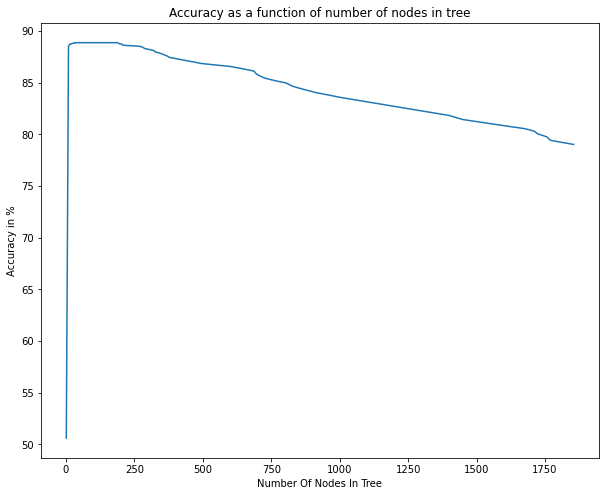

In [19]:
#### Your code here ####
def get_all_fathers_to_atleast_one_leaf(node ,fathers_list):
    """
    gets all nodes from tree that have atleast one child that is a leaf recurcivly
 
    Input:
    - node: a node in the decision tree.
    - fathers_list: the list that gathers all relevant 
 
    Output: 
    """
    #if node is None return
    if node==None:
        return
    if node.is_leaf == True:
        return 
    
    for child in node.children:
        if child.is_leaf:
            if node in fathers_list:
                pass
            else:
                fathers_list.append(node)
        get_all_fathers_to_atleast_one_leaf(child ,fathers_list)
    
    return

def node_to_prun(root, fathers_list,dataset):
    """
    loops througe a list of nodes and clculates what is the best node that will transform to a leaf
    The node that will bring the best accuracy if he will transform to a leaf. 
 
    Input:
    - root: the root of the given tree
    - fathers_list: the list that gathers all relevant 
 
    Output:
    best_node:The node that will bring the best accuracy if he will transform to a leaf.
    """
    dic = {}
    
    #iterate througe nodes list, and calculating the accuracy of the tree when a node transforms to a leaf
    for node in fathers_list:
        node.is_leaf = True
        dic[node] = calc_accuracy(root,dataset)
        node.is_leaf = False
      
    #choose the best accuracy node
    
    best_node = max(dic,key=dic.get)
    return best_node

def count_nodes_first(node, num_of_nodes = 0):
        '''
        counts the number of nodes in node tree
        Input:
        num_of_nodes: recursive var to calculate nodes

        Output: 
        number of nodes in the subtree including self node. 
        '''
        if node.is_leaf:
            return num_of_nodes+1
        for child in node.children:
            num_of_nodes = num_of_nodes + count_nodes_first(child)
        
        return num_of_nodes


def post_pruning(root,data_test):
    '''
    function that does post pruning on a dicision tree
    
    Input:
    root: the tree root
    data_test: the data test for calculating accuracy 

    Output: 
    A dictionary that holds keys that represent the number of nodes in the tree.
    for each key the value represents the accuracy of that tree 
    '''
    
    dic_num_nodes_accuracy={}
    while(not root.is_leaf):
        fathers_list = []
        get_all_fathers_to_atleast_one_leaf(root ,fathers_list)
        node_to_leaf = node_to_prun( root, fathers_list , data_test)
        node_to_leaf.is_leaf = True
        dic_num_nodes_accuracy[count_nodes_first(root)] = calc_accuracy(root,X_test)
        
    return dic_num_nodes_accuracy


def plot_dictionary(dic):
    num_of_nodes_list = dic.items()
    num_of_nodes_list = sorted(num_of_nodes_list)
    x, y = zip(*num_of_nodes_list)

    plt.plot(x, y)
    plt.xlabel('Number Of Nodes In Tree')
    plt.ylabel('Accuracy in %')
    plt.title('Accuracy as a function of number of nodes in tree')
    plt.show()
    


dic = post_pruning(tree_entropy_gain_ratio,X_test)
plot_dictionary(dic)


## Chi square pre-pruning

Consider the following p-value cut-off values: [1 (no pruning), 0.5, 0.25, 0.1, 0.05, 0.0001 (max pruning)]. For each value, construct a tree and prune it according to the cut-off value. Next, calculate the training and testing accuracy. On a single plot, draw the training and testing accuracy as a function of the tuple (p-value, tree depth). Mark the best result on the graph with red circle. 

In [20]:
### Chi square table values ###
# The first key is the degree of freedom 
# The second key is the p-value cut-off
# The values are the chi-statistic that you need to use in the pruning
chi_table = {1: {0.5 : 0.45,
                 0.25 : 1.32,
                 0.1 : 2.71,
                 0.05 : 3.84,
                 0.0001 : 100000},
             2: {0.5 : 1.39,
                 0.25 : 2.77,
                 0.1 : 4.60,
                 0.05 : 5.99,
                 0.0001 : 100000},
             3: {0.5 : 2.37,
                 0.25 : 4.11,
                 0.1 : 6.25,
                 0.05 : 7.82,
                 0.0001 : 100000},
             4: {0.5 : 3.36,
                 0.25 : 5.38,
                 0.1 : 7.78,
                 0.05 : 9.49,
                 0.0001 : 100000},
             5: {0.5 : 4.35,
                 0.25 : 6.63,
                 0.1 : 9.24,
                 0.05 : 11.07,
                 0.0001 : 100000},
             6: {0.5 : 5.35,
                 0.25 : 7.84,
                 0.1 : 10.64,
                 0.05 : 12.59,
                 0.0001 : 100000},
             7: {0.5 : 6.35,
                 0.25 : 9.04,
                 0.1 : 12.01,
                 0.05 : 14.07,
                 0.0001 : 100000},
             8: {0.5 : 7.34,
                 0.25 : 10.22,
                 0.1 : 13.36,
                 0.05 : 15.51,
                 0.0001 : 100000},
             9: {0.5 : 8.34,
                 0.25 : 11.39,
                 0.1 : 14.68,
                 0.05 : 16.92,
                 0.0001 : 100000},
             10: {0.5 : 9.34,
                  0.25 : 12.55,
                  0.1 : 15.99,
                  0.05 : 18.31,
                  0.0001 : 100000},
             11: {0.5 : 10.34,
                  0.25 : 13.7,
                  0.1 : 17.27,
                  0.05 : 19.68,
                  0.0001 : 100000}}

In [21]:
p_values_cut_off = [1 , 0.5, 0.25, 0.1, 0.05, 0.0001]
tree_dic = {}
training_accuracy = []
test_accuracy = []
tree_depth = [] 

for p_value in p_values_cut_off:
    
    #bulding a tree with consideration of the p value
    tree_entropy_gain_ratio_chi = build_tree( X_train, calc_entropy, True, p_value)
    
    #saving each p value with its corrisponding root node
    tree_dic[p_value] = tree_entropy_gain_ratio_chi
    
    #adding the plot data to the relvent list 
    training_accuracy.append(calc_accuracy(tree_entropy_gain_ratio_chi, X_train))
    test_accuracy.append(calc_accuracy(tree_entropy_gain_ratio_chi, X_test))
    tree_depth.append(tree_entropy_gain_ratio_chi.get_depth())

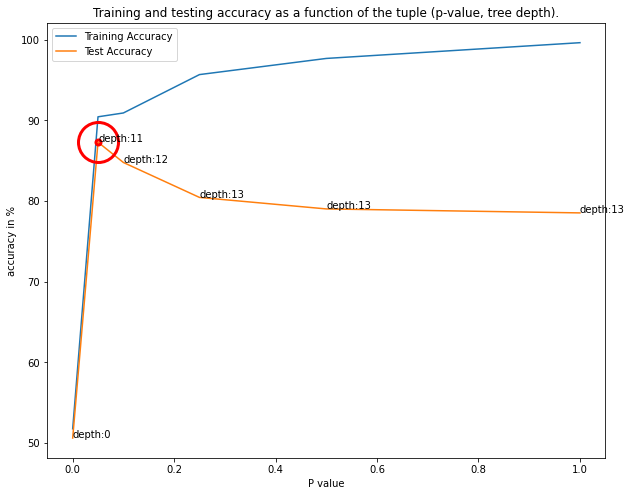

In [22]:
#drawing the training and testing accuracy as a function of the tuple (p-value, tree depth) 
circle_rad = 20
fig, ax = plt.subplots()
ax.plot(p_values_cut_off, training_accuracy)
ax.plot(p_values_cut_off, test_accuracy)
ax.plot( p_values_cut_off[test_accuracy.index(max(test_accuracy))],max(test_accuracy),'o',ms =circle_rad*2 , mec="r" ,mfc='None' , mew=3 )
ax.plot( p_values_cut_off[test_accuracy.index(max(test_accuracy))],max(test_accuracy),'o',ms =5 , mec="r" ,mfc='None' , mew=3 )
ax.legend(["Training Accuracy","Test Accuracy"])
ax.set_title('Training and testing accuracy as a function of the tuple (p-value, tree depth).')
ax.set_xlabel('P value')
ax.set_ylabel('accuracy in %')
for i, txt in enumerate(tree_depth):
    ax.annotate("depth:"+str(txt) , (p_values_cut_off[i],test_accuracy[i]))
#ax.add_patch(circle)

Build the best 2 trees:
1. tree_post_pruning - the best tree according to post pruning
1. tree_chi - the best tree according to chi square pruning

In [23]:
tree_post_pruning  = build_tree(data=X_train, impurity=calc_entropy, gain_ratio=True)
best_number_of_nodes = max(dic,key=dic.get)

while(not tree_post_pruning.is_leaf and count_nodes_first(tree_post_pruning) > best_number_of_nodes):
    fathers_list = []
    get_all_fathers_to_atleast_one_leaf(tree_post_pruning ,fathers_list)
    node_to_leaf = node_to_prun( tree_post_pruning, fathers_list , X_test)
    node_to_leaf.is_leaf = True
        

max_value = max(test_accuracy)
tree_chi = build_tree(X_train, calc_entropy, True, p_values_cut_off[test_accuracy.index(max_value)])

## Number of Nodes

Of the two trees above we will choose the one with fewer nodes. Complete the function counts_nodes and print the number of nodes in each tree. 

In [24]:
def count_nodes(node):
    """
    Count the number of node in a given tree
 
    Input:
    - node: a node in the decision tree.
 
    Output: the number of node in the tree.
    """
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    return count_nodes_first(node)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    

In [25]:
print("Number of Nodes in tree_post_pruning is:{0}".format(count_nodes(tree_post_pruning)))
print("Number of Nodes in tree_chi is: {0}".format(count_nodes(tree_chi )))

Number of Nodes in tree_post_pruning is:188
Number of Nodes in tree_chi is: 804


## Print the tree

Complete the function `print_tree` and execute it on your chosen tree. Your tree should be visualized clearly. You can use the following example as a reference:
```
[ROOT, feature=X0],
  [X0=a, feature=X2]
    [X2=c, leaf]: [{1.0: 10}]
    [X2=d, leaf]: [{0.0: 10}]
  [X0=y, feature=X5], 
    [X5=a, leaf]: [{1.0: 5}]
    [X5=s, leaf]: [{0.0: 10}]
  [X0=e, leaf]: [{0.0: 25, 1.0: 50}]
```
In each brackets:
* The first argument is the parent feature with the value that led to current node
* The second argument is the selected feature of the current node
* If the current node is a leaf, you need to print also the labels and their counts



In [26]:
# you can change the function signeture
def print_tree(node, depth=0, parent_feature='ROOT', feature_val='ROOT'):
    '''
    prints the tree according to the example above

    Input:
    - node: a node in the decision tree

    This function has no return value
    '''
  
    for num_of_depth in range(depth):
        print("\t",end="")

    if not node.children:
        class_values, class_count = np.unique(node.node_data[:, -1] , return_counts=True)
        print(f"[X{node.father_best_feature}, leaf]: [{dict(zip(class_values,class_count))}]")

    else:
        if parent_feature == 'ROOT':
            print(f"[ROOT, feature=X{node.best_feature_for_current_node}],")
        else:
            print(f"[X{node.father_best_feature}={node.letter}],feature=X{node.best_feature_for_current_node}],")
        for child in node.children:
            print_tree(node=child, depth=depth + 1, parent_feature=child.father_best_feature,feature_val=child.letter)
            

In [27]:
print_tree(tree_post_pruning)

[ROOT, feature=X4],
	[X4=a],feature=X2],
		[X2=n],feature=X8],
			[X8=n],feature=X19],
				[X19=s],feature=X0],
					[X0=f],feature=X18],
						[X18, leaf]: [{'e': 1}]
						[X18=n],feature=X20],
							[X20, leaf]: [{'e': 1}]
							[X20, leaf]: [{'p': 1}]
					[X0, leaf]: [{'e': 2, 'p': 2}]
				[X19, leaf]: [{'e': 8}]
			[X8=p],feature=X0],
				[X0=f],feature=X19],
					[X19, leaf]: [{'e': 2}]
					[X19, leaf]: [{'p': 1}]
				[X0, leaf]: [{'e': 7}]
			[X8=w],feature=X18],
				[X18=k],feature=X0],
					[X0, leaf]: [{'e': 3}]
					[X0=x],feature=X20],
						[X20, leaf]: [{'p': 1}]
						[X20, leaf]: [{'e': 2}]
				[X18, leaf]: [{'e': 7}]
		[X2=w],feature=X6],
			[X6=c],feature=X8],
				[X8=g],feature=X0],
					[X0=b],feature=X18],
						[X18, leaf]: [{'e': 6}]
						[X18=n],feature=X1],
							[X1=s],feature=X19],
								[X19, leaf]: [{'e': 1}]
								[X19, leaf]: [{'p': 1}]
							[X1, leaf]: [{'e': 2}]
					[X0, leaf]: [{'e': 13}]
				[X8=k],feature=X0],
					[X0=b],feature=X1],
		

								[X13, leaf]: [{'p': 27}]
								[X13=p],feature=X12],
									[X12, leaf]: [{'p': 6}]
									[X12=n],feature=X8],
										[X8=g],feature=X1],
											[X1, leaf]: [{'e': 1}]
											[X1=y],feature=X2],
												[X2, leaf]: [{'p': 1}]
												[X2, leaf]: [{'e': 1}]
										[X8, leaf]: [{'p': 1}]
										[X8, leaf]: [{'p': 2}]
									[X12, leaf]: [{'p': 9}]
						[X20=g],feature=X13],
							[X13=b],feature=X0],
								[X0=f],feature=X12],
									[X12=b],feature=X1],
										[X1, leaf]: [{'p': 4}]
										[X1=y],feature=X2],
											[X2, leaf]: [{'p': 3}]
											[X2=y],feature=X8],
												[X8, leaf]: [{'p': 1}]
												[X8, leaf]: [{'e': 1}]
									[X12=n],feature=X1],
										[X1, leaf]: [{'p': 4}]
										[X1=y],feature=X8],
											[X8=g],feature=X2],
												[X2, leaf]: [{'p': 1}]
												[X2, leaf]: [{'e': 1}]
											[X8, leaf]: [{'p': 2}]
											[X8=p],feature=X2],
												[X2, leaf]: [{'e': 1}]
			

											[X13=n],feature=X0],
												[X0, leaf]: [{'p': 1}]
												[X0, leaf]: [{'e': 1}]
											[X13=p],feature=X0],
												[X0, leaf]: [{'e': 1}]
												[X0, leaf]: [{'p': 1}]
										[X1, leaf]: [{'p': 5}]
								[X20=g],feature=X13],
									[X13=b],feature=X12],
										[X12, leaf]: [{'p': 2}]
										[X12=n],feature=X0],
											[X0=f],feature=X1],
												[X1, leaf]: [{'p': 1}]
												[X1, leaf]: [{'e': 1}]
											[X0, leaf]: [{'e': 1}]
										[X12=p],feature=X0],
											[X0, leaf]: [{'p': 2}]
											[X0=x],feature=X1],
												[X1, leaf]: [{'e': 1}]
												[X1, leaf]: [{'p': 1}]
									[X13=n],feature=X0],
										[X0, leaf]: [{'p': 4}]
										[X0=x],feature=X12],
											[X12, leaf]: [{'p': 2}]
											[X12, leaf]: [{'p': 1}]
											[X12=p],feature=X1],
												[X1, leaf]: [{'e': 1}]
												[X1, leaf]: [{'p': 1}]
									[X13=p],feature=X1],
										[X1, leaf]: [{'p': 5}]
							

										[X2, leaf]: [{'e': 1}]
										[X2, leaf]: [{'p': 1}]
									[X1, leaf]: [{'e': 1}]
						[X0, leaf]: [{'p': 16}]
						[X0=x],feature=X1],
							[X1=s],feature=X2],
								[X2=e],feature=X13],
									[X13, leaf]: [{'e': 1}]
									[X13, leaf]: [{'p': 3}]
								[X2, leaf]: [{'p': 4}]
							[X1=y],feature=X2],
								[X2=e],feature=X20],
									[X20, leaf]: [{'p': 1}]
									[X20, leaf]: [{'e': 1}]
								[X2=n],feature=X13],
									[X13, leaf]: [{'p': 2}]
									[X13=w],feature=X20],
										[X20, leaf]: [{'e': 1}]
										[X20, leaf]: [{'p': 1}]
			[X11=s],feature=X1],
				[X1=s],feature=X0],
					[X0=f],feature=X2],
						[X2=e],feature=X13],
							[X13, leaf]: [{'p': 4}]
							[X13=w],feature=X20],
								[X20, leaf]: [{'p': 2}]
								[X20, leaf]: [{'e': 1}]
						[X2, leaf]: [{'p': 10}]
					[X0=k],feature=X20],
						[X20=d],feature=X2],
							[X2, leaf]: [{'p': 3}]
							[X2=n],feature=X13],
								[X13, leaf]: [{'p': 1}]
								[X13,

						[X0=b],feature=X19],
							[X19, leaf]: [{'p': 1}]
							[X19, leaf]: [{'e': 2}]
						[X0=x],feature=X19],
							[X19, leaf]: [{'e': 2}]
							[X19=s],feature=X20],
								[X20, leaf]: [{'e': 1}]
								[X20, leaf]: [{'p': 1}]
					[X8=n],feature=X19],
						[X19=n],feature=X0],
							[X0, leaf]: [{'e': 2}]
							[X0, leaf]: [{'p': 1}]
						[X19, leaf]: [{'e': 3}]
						[X19, leaf]: [{'e': 2}]
					[X8=p],feature=X0],
						[X0, leaf]: [{'p': 1}]
						[X0, leaf]: [{'e': 1}]
					[X8=w],feature=X20],
						[X20, leaf]: [{'e': 1}]
						[X20, leaf]: [{'e': 4}]
						[X20, leaf]: [{'e': 2, 'p': 2}]
				[X18, leaf]: [{'e': 5}]
			[X2=y],feature=X8],
				[X8=g],feature=X18],
					[X18, leaf]: [{'e': 7}]
					[X18=n],feature=X19],
						[X19, leaf]: [{'e': 2}]
						[X19, leaf]: [{'e': 2, 'p': 2}]
				[X8=k],feature=X0],
					[X0=b],feature=X18],
						[X18, leaf]: [{'e': 2}]
						[X18=n],feature=X20],
							[X20, leaf]: [{'p': 1}]
							[X20, leaf]: [{'e': 1}]
					[X0, 

										[X8, leaf]: [{'e': 2}]
										[X8, leaf]: [{'e': 2}]
									[X19, leaf]: [{'e': 6}]
								[X12=p],feature=X8],
									[X8, leaf]: [{'e': 2}]
									[X8, leaf]: [{'e': 2}]
									[X8=u],feature=X0],
										[X0=f],feature=X19],
											[X19, leaf]: [{'p': 1}]
											[X19, leaf]: [{'e': 1}]
										[X0, leaf]: [{'e': 2}]
									[X8=w],feature=X0],
										[X0, leaf]: [{'p': 1}]
										[X0=x],feature=X19],
											[X19, leaf]: [{'e': 1}]
											[X19, leaf]: [{'p': 1}]
								[X12, leaf]: [{'e': 12}]
							[X13=w],feature=X19],
								[X19=v],feature=X8],
									[X8, leaf]: [{'e': 3}]
									[X8=p],feature=X12],
										[X12=g],feature=X0],
											[X0, leaf]: [{'e': 1}]
											[X0, leaf]: [{'p': 1}]
										[X12, leaf]: [{'e': 2}]
										[X12=w],feature=X0],
											[X0, leaf]: [{'p': 1}]
											[X0, leaf]: [{'e': 1}]
									[X8=u],feature=X0],
										[X0, leaf]: [{'p': 1}]
										[X0, leaf]: [{'e': 2}]
		

									[X8=n],feature=X2],
										[X2, leaf]: [{'p': 1}]
										[X2=g],feature=X0],
											[X0, leaf]: [{'e': 1}]
											[X0, leaf]: [{'p': 1}]
										[X2, leaf]: [{'e': 2}]
									[X8, leaf]: [{'e': 3}]
									[X8=u],feature=X2],
										[X2, leaf]: [{'e': 2}]
										[X2=g],feature=X0],
											[X0, leaf]: [{'e': 1}]
											[X0, leaf]: [{'p': 1}]
										[X2, leaf]: [{'e': 2}]
									[X8=w],feature=X2],
										[X2, leaf]: [{'e': 2}]
										[X2, leaf]: [{'e': 1}]
										[X2=n],feature=X0],
											[X0, leaf]: [{'e': 1}]
											[X0, leaf]: [{'p': 1}]
								[X13=p],feature=X8],
									[X8=n],feature=X0],
										[X0, leaf]: [{'e': 3}]
										[X0=x],feature=X2],
											[X2, leaf]: [{'p': 1}]
											[X2, leaf]: [{'e': 1}]
											[X2, leaf]: [{'p': 1}]
									[X8=p],feature=X2],
										[X2=e],feature=X0],
											[X0, leaf]: [{'p': 1}]
											[X0, leaf]: [{'e': 1}]
										[X2, leaf]: [{'e': 2}]
						

												[X1, leaf]: [{'p': 1}]
									[X12=w],feature=X1],
										[X1=f],feature=X0],
											[X0=f],feature=X13],
												[X13, leaf]: [{'e': 1}]
												[X13, leaf]: [{'p': 1}]
											[X0, leaf]: [{'e': 2}]
										[X1, leaf]: [{'e': 4}]
								[X2=g],feature=X12],
									[X12=g],feature=X13],
										[X13, leaf]: [{'e': 3}]
										[X13=p],feature=X1],
											[X1, leaf]: [{'e': 1}]
											[X1, leaf]: [{'p': 1}]
										[X13, leaf]: [{'e': 3}]
									[X12, leaf]: [{'e': 12}]
									[X12, leaf]: [{'e': 8}]
								[X2=n],feature=X13],
									[X13=g],feature=X1],
										[X1, leaf]: [{'e': 5}]
										[X1=y],feature=X12],
											[X12=g],feature=X0],
												[X0, leaf]: [{'e': 1}]
												[X0, leaf]: [{'p': 1}]
											[X12, leaf]: [{'e': 2}]
											[X12, leaf]: [{'e': 1}]
									[X13=p],feature=X1],
										[X1=f],feature=X0],
											[X0, leaf]: [{'e': 2}]
											[X0=x],feature=X12],
												[X12, l

										[X1=y],feature=X19],
											[X19, leaf]: [{'e': 1}]
											[X19, leaf]: [{'p': 1}]
								[X0, leaf]: [{'e': 8}]
							[X2, leaf]: [{'e': 18}]
							[X2=n],feature=X0],
								[X0, leaf]: [{'e': 9}]
								[X0=x],feature=X19],
									[X19=v],feature=X1],
										[X1, leaf]: [{'e': 2}]
										[X1=y],feature=X13],
											[X13, leaf]: [{'p': 1}]
											[X13, leaf]: [{'p': 1}]
											[X13, leaf]: [{'e': 1}]
									[X19, leaf]: [{'e': 5}]
						[X12=w],feature=X13],
							[X13, leaf]: [{'e': 19}]
							[X13=p],feature=X2],
								[X2=e],feature=X0],
									[X0, leaf]: [{'e': 3}]
									[X0=x],feature=X1],
										[X1, leaf]: [{'p': 2}]
										[X1, leaf]: [{'e': 1}]
								[X2=g],feature=X19],
									[X19, leaf]: [{'p': 1}]
									[X19=y],feature=X0],
										[X0=f],feature=X1],
											[X1, leaf]: [{'e': 1}]
											[X1, leaf]: [{'p': 1}]
										[X0, leaf]: [{'e': 1}]
								[X2, leaf]: [{'e': 5}]
							[X13=w],featur

								[X0, leaf]: [{'e': 3}]
								[X0=s],feature=X8],
									[X8, leaf]: [{'p': 1}]
									[X8, leaf]: [{'e': 1}]
									[X8, leaf]: [{'e': 1}]
								[X0, leaf]: [{'e': 3}]
							[X19, leaf]: [{'e': 8}]
						[X18, leaf]: [{'e': 20}]
					[X2=n],feature=X18],
						[X18=k],feature=X0],
							[X0, leaf]: [{'e': 5}]
							[X0=s],feature=X19],
								[X19=v],feature=X8],
									[X8, leaf]: [{'p': 1}]
									[X8, leaf]: [{'e': 1}]
									[X8, leaf]: [{'e': 1}]
									[X8, leaf]: [{'p': 1}]
								[X19, leaf]: [{'e': 3}]
							[X0, leaf]: [{'e': 6}]
						[X18=n],feature=X19],
							[X19=v],feature=X0],
								[X0, leaf]: [{'e': 4}]
								[X0, leaf]: [{'e': 3}]
								[X0=x],feature=X8],
									[X8, leaf]: [{'e': 1}]
									[X8, leaf]: [{'p': 1}]
									[X8, leaf]: [{'p': 1}]
									[X8, leaf]: [{'e': 1}]
							[X19=y],feature=X0],
								[X0=f],feature=X8],
									[X8, leaf]: [{'e': 1}]
									[X8, leaf]: [{'e': 1}]
									[X8, leaf]: [{'p': 

									[X1, leaf]: [{'e': 1}]
									[X1, leaf]: [{'p': 1}]
								[X20, leaf]: [{'p': 2}]
					[X10=s],feature=X20],
						[X20, leaf]: [{'p': 9}]
						[X20=l],feature=X1],
							[X1=s],feature=X0],
								[X0=f],feature=X2],
									[X2, leaf]: [{'e': 1}]
									[X2, leaf]: [{'p': 1}]
								[X0, leaf]: [{'p': 2}]
							[X1, leaf]: [{'p': 6}]
						[X20=p],feature=X0],
							[X0, leaf]: [{'p': 2}]
							[X0, leaf]: [{'p': 3}]
							[X0, leaf]: [{'e': 2, 'p': 2}]
			[X12=w],feature=X0],
				[X0, leaf]: [{'p': 38}]
				[X0=k],feature=X20],
					[X20=d],feature=X10],
						[X10=k],feature=X2],
							[X2, leaf]: [{'e': 2, 'p': 2}]
							[X2, leaf]: [{'p': 2}]
						[X10, leaf]: [{'p': 7}]
					[X20, leaf]: [{'p': 7}]
					[X20=p],feature=X1],
						[X1, leaf]: [{'p': 7}]
						[X1=y],feature=X2],
							[X2, leaf]: [{'p': 3}]
							[X2=n],feature=X10],
								[X10, leaf]: [{'p': 1}]
								[X10=s],feature=X11],
									[X11, leaf]: [{'p': 1}]
									[X11, leaf]: [

								[X13, leaf]: [{'e': 1}]
						[X20=p],feature=X11],
							[X11=k],feature=X13],
								[X13, leaf]: [{'e': 1}]
								[X13, leaf]: [{'p': 2}]
							[X11=s],feature=X2],
								[X2, leaf]: [{'e': 1}]
								[X2=n],feature=X13],
									[X13, leaf]: [{'p': 1}]
									[X13, leaf]: [{'e': 1}]
					[X10=s],feature=X11],
						[X11, leaf]: [{'p': 10}]
						[X11=s],feature=X13],
							[X13=p],feature=X20],
								[X20, leaf]: [{'p': 2}]
								[X20, leaf]: [{'p': 2}]
								[X20=p],feature=X2],
									[X2, leaf]: [{'p': 1}]
									[X2, leaf]: [{'e': 1}]
							[X13=w],feature=X20],
								[X20, leaf]: [{'e': 1}]
								[X20, leaf]: [{'e': 1}]
								[X20, leaf]: [{'p': 2}]
